# Dodanie ścieżki do projektu

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Importowanie bibliotek

In [2]:
from src.scrapers import healthdata, koronawirusunas, meteostat, policjapl, rmf24
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from src.utils import save, paths
from pathlib import Path

# Pobranie i zapisanie danych

In [ ]:
update = False

if len(os.listdir(paths.get_path())) == 0 or update:
    data = {**healthdata.get_data(),
            **koronawirusunas.get_data(),
            **{"meteostat": pd.DataFrame(meteostat.get_data(end_date=str(datetime.datetime.now().date()) ))},
            **policjapl.scrape() }
    save.save_dataframes(data=data)
else:
    print("Data directory is not empty. propably data inside.")

# Załadowanie danych

In [4]:
policja = pd.read_csv(Path(paths.get_path(), "policjapl.csv"), index_col=1, parse_dates=True, dayfirst=True)
health = pd.read_csv(Path(paths.get_path(), "healthdata.csv"), index_col=2, parse_dates=True, dayfirst=True)
korona = pd.read_csv(Path(paths.get_path(), "koronawirusunas.csv"), index_col=0, parse_dates=True, dayfirst=True)
meteo = pd.read_csv(Path(paths.get_path(), "meteostat.csv"), index_col=1, parse_dates=True, dayfirst=True)

# Czyszczenie danych

In [5]:
del meteo["Unnamed: 0"]
del health["V1"]
del policja["Unnamed: 0"]

policja.index.name = None
meteo.index.name = None
health.index.name = None
korona.index.name = None

health = health.drop(health[health.index > "2020-05-20"].index)
health = health[health.location_name == "Poland"]

# Łączenie danych

In [6]:
df = pd.merge(policja, meteo, how='outer', left_index=True,
                  right_index=True)
df = pd.merge(df, health, how='outer', left_index=True,
                  right_index=True)
df = pd.merge(df, korona, how='outer', left_index=True,
                  right_index=True)

df.reset_index(inplace=True)
df.rename(columns={"index": "date"}, inplace=True)

# Ploty i inne ...

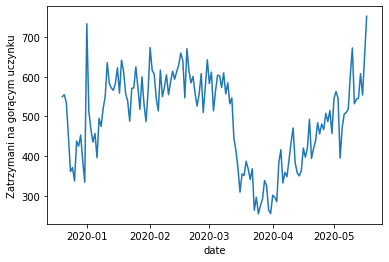

In [7]:
f = sns.lineplot(y="Zatrzymani na gorącym uczynku",x="date",data=df, ci = 90)

In [8]:
df.columns

Index(['date', 'Interwencje', 'Zatrzymani na gorącym uczynku',
       'Zatrzymani poszukiwani', 'Zatrzymani nietrzeźwi kierujący',
       'Wypadki drogowe', 'Zabici w wypadkach', 'Ranni w wypadkach',
       'temperature', 'temperature_min', 'temperature_max', 'precipitation',
       'snowfall', 'snowdepth', 'winddirection', 'windspeed', 'peakgust',
       'sunshine', 'pressure', 'location_name', 'allbed_mean', 'allbed_lower',
       'allbed_upper', 'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper',
       'InvVen_mean', 'InvVen_lower', 'InvVen_upper', 'deaths_mean',
       'deaths_lower', 'deaths_upper', 'admis_mean', 'admis_lower',
       'admis_upper', 'newICU_mean', 'newICU_lower', 'newICU_upper',
       'totdea_mean', 'totdea_lower', 'totdea_upper', 'bedover_mean',
       'bedover_lower', 'bedover_upper', 'icuover_mean', 'icuover_lower',
       'icuover_upper', 'deaths_mean_smoothed', 'deaths_lower_smoothed',
       'deaths_upper_smoothed', 'totdea_mean_smoothed',
       'totdea_lower_

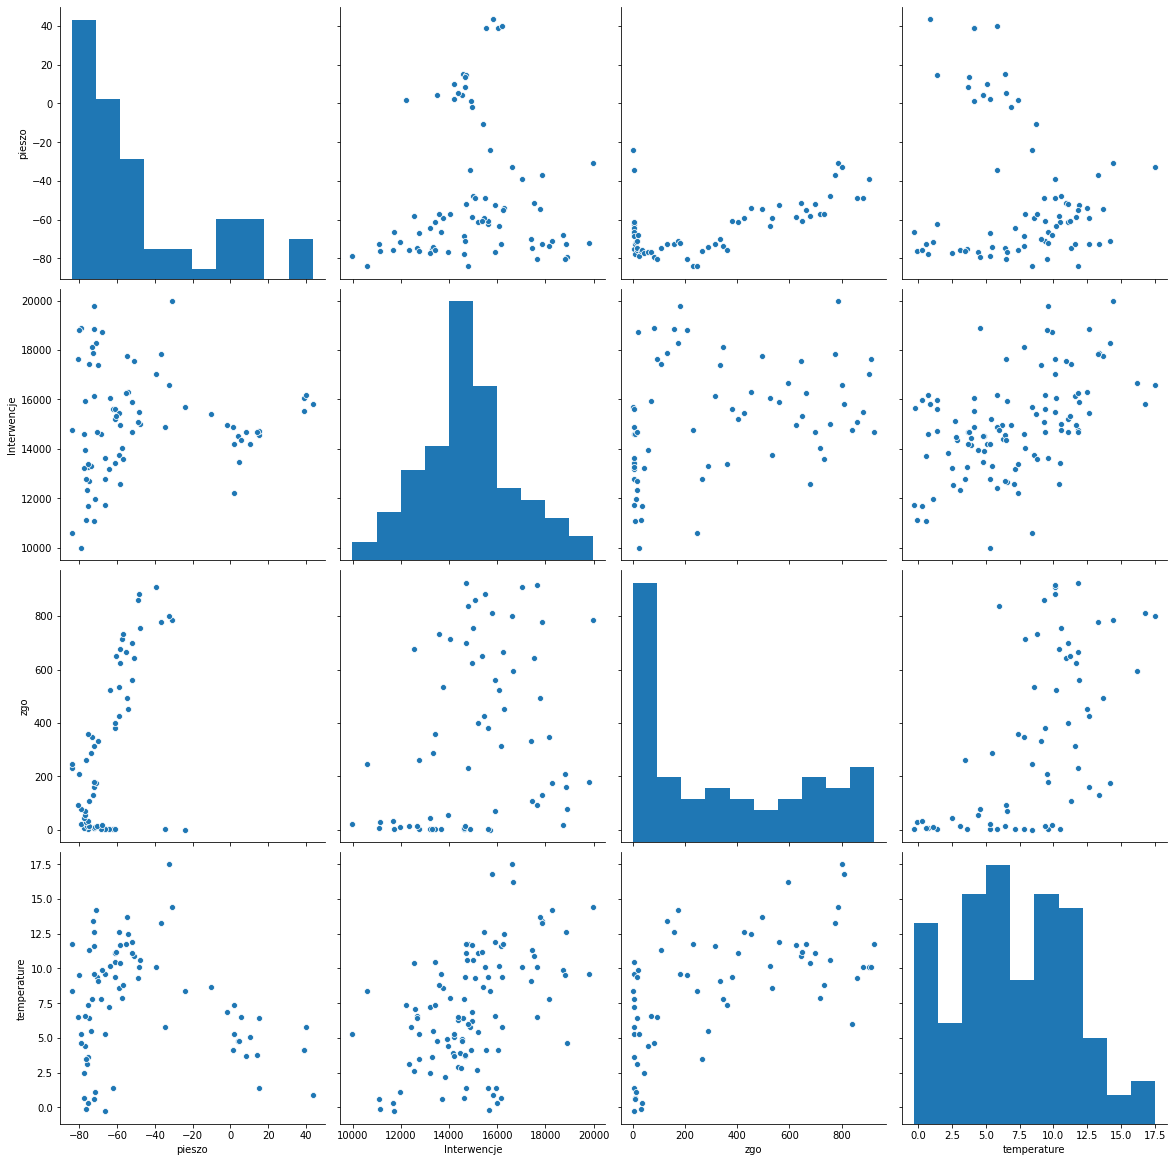

In [47]:
g = sns.pairplot(df, vars=["pieszo","Interwencje","zgo", "temperature"],height=4,dropna=True)
plt.show()

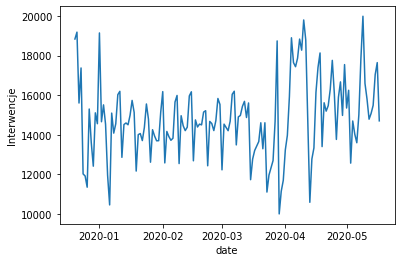

In [46]:
sns.lineplot(data=df, x = "date", y = "Interwencje")